In [2]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.cluster import contingency_matrix


In [14]:
iris = datasets.load_iris()
data = iris.data
targets = iris.target
N, V = data.shape

Choose random sample and plot hist

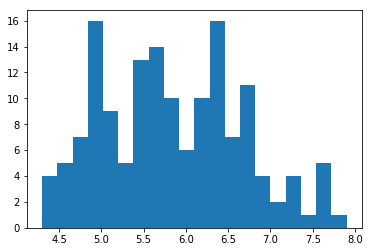

In [10]:
x = data[:,0]
plt.hist(x, bins=20)
plt.show()

In [12]:
m = np.mean(x)
std = np.std(x)
m, sigma

(5.843333333333334, 0.8253012917851409)

Plausible boundaries

In [16]:
a = m
sigma = std / (np.sqrt(N))

Lb = a - 1.96*sigma
Rb = a + 1.96*sigma

Lb, Rb

(5.711257619469684, 5.975409047196983)

Bootstrap

In [25]:
M = 150
K = 5000
r = np.random.randint(0, 149, (M,K))
r.shape

(150, 5000)

In [27]:
xr = x[r]
mr = np.mean(xr, axis=0)
mr, len(mr)

(array([5.89733333, 5.868     , 5.84133333, ..., 5.87333333, 5.85933333,
        5.79533333]), 5000)

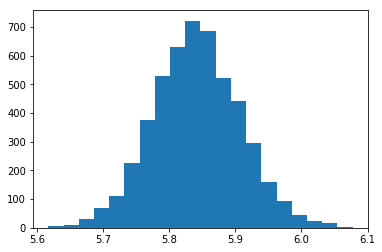

In [32]:
plt.hist(mr, bins=20)
plt.show()

pivotal

In [34]:
mmr = np.mean(mr)
smr  = np.std(mr) # не считаем сигму как раньше потому что тут и так нормальное (вроде) распределение

lpb = mmr - 1.96*smr
rpb = mmr + 1.96*smr

mmr, smr, lpb, rpb

(5.841800533333333, 0.0660238599274199, 5.71239376787559, 5.971207298791076)

non pivotal

In [35]:
xr_ = np.sort(mr)
lbn = xr_[125]
rbn = xr_[4875]

lbn, rbn

(5.712666666666668, 5.97666666666667)

clustering

In [39]:
me = np.mean(data, axis=0) # mean
ra = np.ptp(data, axis=0) # range
Y = np.divide(np.subtract(data, me), ra)
Y.shape

batch_size = 10
centers = np.array([Y[1, :], Y[52, :], Y[111, :]])
n_clusters = len(centers)
n_clusters

clusters = []
mcs = []
ds = []

for i in range(5):
    mbk = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, init=centers)
    mbk.fit(Y) # compute K-mean
    ms = mbk.labels_
    
    for j in range(n_clusters):
        cluster = data[np.where(ms==j)]
        mc = np.mean(cluster, axis=0)
        d = 100 * (np.divide(np.subtract(mc, me), me))
        clusters.append(cluster)
        mcs.append(mc)
        ds.append(d)
        print("delta{}".format(j), d, "#el:", cluster.shape[0])

    print("inertia", mbk.inertia_, '\n')

delta0 [-14.32972048  11.91879502 -61.05001774 -79.64404894] #el: 50
delta1 [17.16178858  0.91850956 51.71773951 73.48335758] #el: 39
delta2 [  0.77338146 -10.35674794  16.97555813  18.30084429] #el: 61
inertia 7.1292266008636185 

delta0 [-14.32972048  11.91879502 -61.05001774 -79.64404894] #el: 50
delta1 [ 0.96976612 -9.98099778 16.84471298 17.61702438] #el: 61
delta2 [16.85462284  0.33079778 51.92239474 74.55292205] #el: 39
inertia 7.2142704280529575 

delta0 [-14.32972048  11.91879502 -61.05001774 -79.64404894] #el: 50
delta1 [  1.20014042 -10.3319732   14.2999427   10.53948832] #el: 52
delta2 [13.62664005 -1.22244052 48.10216389 71.54477197] #el: 48
inertia 8.546289575814269 

delta0 [-14.32972048  11.91879502 -61.05001774 -79.64404894] #el: 50
delta1 [17.09925841  0.93320236 51.05090458 72.27474972] #el: 40
delta2 [  0.54192812 -10.55446409  16.8410784   18.1868743 ] #el: 60
inertia 7.065070620406247 

delta0 [-14.32972048  11.91879502 -61.05001774 -79.64404894] #el: 50
delta1 [1

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Explicit initial center position passed: performing only one init in MiniBatchKMeans instead of n_init=3


In [40]:
y2, m2 = [], []

for k in range(5000):
    y = r[:,k]
    p2 = np.isin(y, idx_1)
    p2 = np.where(p2==True)[0]
    y2 = xr[np.where(p2=True)]
    m2_ = np.mean(y2)
    if not np.isnan(m2_):
        m2.append(m2_)

NameError: name 'idx_1' is not defined